##Recurrent Neural Networks for Sequence Data

In [ ]:
##PVG98
## Importing necessary libraries for data handling and visualization
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##PVG98
#Importing the Tensorflow and keras for timeseries RNN
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense , SimpleRNN

In [ ]:
##PVG98
#Importing  keras for timegenerator and min max scaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import  MinMaxScaler

 ## Generating Data

In [ ]:
##PVG98
#Creating Simple sine wave using numpy
x = np.linspace(0,64,1024)
y = np.sin(x)

In [ ]:
##PVG98
x

array([0.00000000e+00, 6.25610948e-02, 1.25122190e-01, ...,
       6.38748778e+01, 6.39374389e+01, 6.40000000e+01])

In [ ]:
##PVG98
y

array([0.        , 0.06252029, 0.12479597, ..., 0.86393146, 0.89372716,
       0.92002604])

### Plotting the sine wave to visualize the periodic pattern created by the sine function.



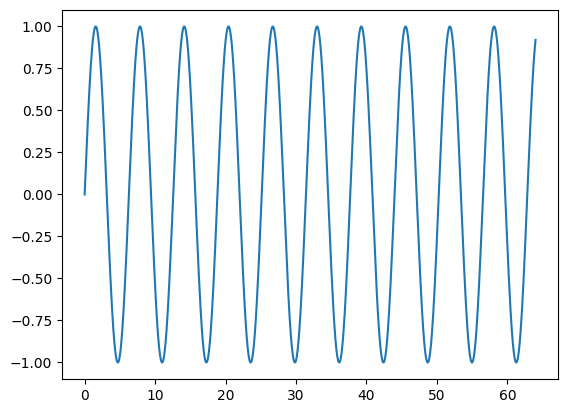

In [ ]:
##PVG98
plt.plot(x,y)

In [ ]:
##PVG98
#Loading data into dataframe index as x , data as y
df=pd.DataFrame(data=y, index=x, columns=['sine'])

In [ ]:
##PVG98
df.head(5)

,sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [ ]:
##PVG98
len(df)

1024

## Split data (Train and Test)

In [ ]:
##PVG98
#Testing the data percentage at 20%
test_percent=0.2

In [ ]:

##PVG98
#Number of data points reserved for testing the model
len(df)*test_percent

204.8

In [ ]:
##PVG98
#re writing the code to find the test data length
test_length = np.round(len(df)*test_percent)

In [ ]:
##PVG98
test_length

205.0

In [ ]:
##PVG98
#the test data starts at this index
test_start_index = int(len(df)- test_length)

In [ ]:
##PVG98
test_start_index

819

In [ ]:
##PVG98
#Create separate training and testing datasets
#Training data includes start to test_start_index
data_train = df.iloc[: test_start_index]
#Testing data starts from test_start_index to end of the dataframe
data_test = df.iloc[test_start_index :]

In [ ]:

##PVG98
data_train.head(5)

,sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [ ]:
##PVG98
data_test.head(5)

,sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887


<h1>Normalization of Data</h1>

In [ ]:
##PVG98
#create a minmax scaler to normalize the data
scaler = MinMaxScaler()

In [ ]:
##PVG98
#train the scaler to perform the normalization
scaler.fit(data_train)

MinMaxScaler()

In [ ]:
##PVG98
#normalize both the training and testing dataset
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

## Create a time series generator instance

In [ ]:
##PVG98
#Setting length of input sequence ,batch size and creating a time series generator for training set
length = 50
batch_size = 1
train_tsGenerator50 =TimeseriesGenerator(normalized_train,normalized_train, length=length, batch_size=batch_size)

In [ ]:
##PVG98
#Checking the Batch
x,y=train_tsGenerator50[0]

In [ ]:
##PVG98
#To get flatten array
x.flatten()

array([0.49999882, 0.53125908, 0.56239703, 0.59329085, 0.62381964,
       0.65386398, 0.6833063 , 0.7120314 , 0.73992691, 0.76688367,
       0.79279621, 0.81756315, 0.84108759, 0.86327747, 0.88404598,
       0.90331187, 0.92099975, 0.93704041, 0.9513711 , 0.96393574,
       0.97468518, 0.98357735, 0.99057747, 0.99565814, 0.99879949,
       0.99998922, 0.99922268, 0.99650287, 0.99184044, 0.98525361,
       0.97676818, 0.96641732, 0.95424156, 0.94028851, 0.92461278,
       0.90727571, 0.88834511, 0.86789506, 0.84600558, 0.82276231,
       0.79825619, 0.7725831 , 0.7458435 , 0.718142  , 0.68958699,
       0.66029019, 0.63036624, 0.59993221, 0.56910717, 0.53801175])

In [ ]:
##PVG98
# predicts the next value
y

array([[0.50676759]])

<h1> Build ,  Train and Test Model</h1>


<h2> Building SimpleRNN Model</h2>

<h1>PART V: Redesign Simple RNN</h1>

In [ ]:
##PVG98
# we write this command to check howmany features have been used in the traning model

n_features = 1
model = Sequential()
#Adding 2 layers simple RNN and dense layers
model.add(SimpleRNN(64, return_sequences=True, input_shape=(length, n_features)))

# Adding a second SimpleRNN layer with 64 neurons
model.add(SimpleRNN(85))

# Adding a fully connected (Dense) layer for the final prediction
# Output: predicting the next data point of the input sequence (only one value)
model.add(Dense(1))

<h1>Compile Model</h2>

In [ ]:
##PVG98
#compile the model and use optimizer Adam and Loss MSE , here we use MSE because the data is continuos : aregression problem
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 50, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 85)                  │          12,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              86 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,060 (66.64 KB)

 Trainable params: 17,060 (66.64 KB)

 Non-trainable params: 0 (0.00 B)

<h1> Train (Fit) Model</h1>

In [ ]:
##PVG98
#fit the model by using the below command
model.fit(train_tsGenerator50,epochs=5)

Epoch 1/5
769/769 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 0.0362
Epoch 2/5
769/769 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - loss: 0.0035
Epoch 3/5
769/769 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 1.2245e-04
Epoch 4/5
769/769 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 4.4640e-04
Epoch 5/5
769/769 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 1.3270e-04


<h1>Visualize Model's Performance after Training</h1>

<Axes: >

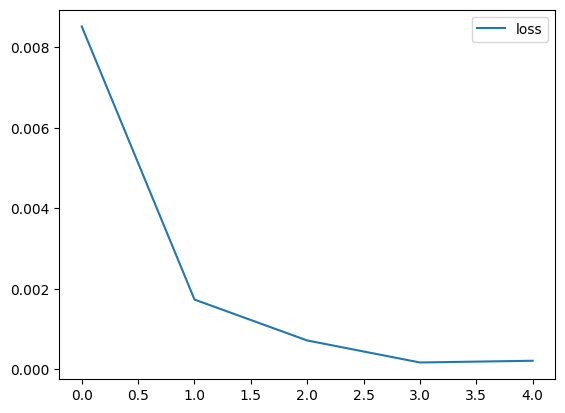

In [ ]:
##PVG98
#load the loss data into a dataframe and visulaize the dataframe

df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

<h1>Evaluate Model on Test Data</h1>


In [ ]:
##PVG98
#number of time steps of the input time series
length

50

In [ ]:
##PVG98
#1st series  batch
first_eval_batch =normalized_train[-length :]
first_eval_batch

array([[8.31976169e-02],
       [6.67457884e-02],
       [5.19891118e-02],
       [3.89853243e-02],
       [2.77853048e-02],
       [1.84328746e-02],
       [1.09646261e-02],
       [5.40977978e-03],
       [1.79006951e-03],
       [1.19657859e-04],
       [4.05080501e-04],
       [2.64522069e-03],
       [6.83131362e-03],
       [1.29469807e-02],
       [2.09682938e-02],
       [3.08638684e-02],
       [4.25949871e-02],
       [5.61157506e-02],
       [7.13732572e-02],
       [8.83078103e-02],
       [1.06853151e-01],
       [1.26936720e-01],
       [1.48479936e-01],
       [1.71398511e-01],
       [1.95602771e-01],
       [2.20998016e-01],
       [2.47484883e-01],
       [2.74959740e-01],
       [3.03315088e-01],
       [3.32439984e-01],
       [3.62220472e-01],
       [3.92540034e-01],
       [4.23280041e-01],
       [4.54320219e-01],
       [4.85539119e-01],
       [5.16814595e-01],
       [5.48024277e-01],
       [5.79046054e-01],
       [6.09758550e-01],
       [6.40041598e-01],


In [ ]:
##PVG98
#reshape the batch it is necessary to be in 3d
first_eval_batch = first_eval_batch.reshape((1 , length , n_features))
first_eval_batch

array([[[8.31976169e-02],
        [6.67457884e-02],
        [5.19891118e-02],
        [3.89853243e-02],
        [2.77853048e-02],
        [1.84328746e-02],
        [1.09646261e-02],
        [5.40977978e-03],
        [1.79006951e-03],
        [1.19657859e-04],
        [4.05080501e-04],
        [2.64522069e-03],
        [6.83131362e-03],
        [1.29469807e-02],
        [2.09682938e-02],
        [3.08638684e-02],
        [4.25949871e-02],
        [5.61157506e-02],
        [7.13732572e-02],
        [8.83078103e-02],
        [1.06853151e-01],
        [1.26936720e-01],
        [1.48479936e-01],
        [1.71398511e-01],
        [1.95602771e-01],
        [2.20998016e-01],
        [2.47484883e-01],
        [2.74959740e-01],
        [3.03315088e-01],
        [3.32439984e-01],
        [3.62220472e-01],
        [3.92540034e-01],
        [4.23280041e-01],
        [4.54320219e-01],
        [4.85539119e-01],
        [5.16814595e-01],
        [5.48024277e-01],
        [5.79046054e-01],
        [6.0

In [ ]:
##PVG98
#now check the shape
first_eval_batch.shape

(1, 50, 1)

<h1>Evaluate Model</h1>

In [ ]:
##PVG98
# the full code is for evaluation, at first create a empty set to store all predicitons
test_predictions = []
#this is last 50 datapoints of the train set
first_eval_batch= normalized_train[-length:]
#reshape the batch to 3d array
current_batch =first_eval_batch.reshape((1 ,length,n_features))
#run for loop to make a prediction and get the value and store the prediction
for i in range(len(data_test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
# generate a new batch to prepare for the next iteration of the testing and drop the first data of the current inputsequence
  current_batch= np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

In [ ]:
##PVG98
#convert the scaled results back to the real values
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 8.35775713e-01],
       [ 8.73300989e-01],
       [ 9.07817076e-01],
       [ 9.40447041e-01],
       [ 9.71981595e-01],
       [ 9.98497577e-01],
       [ 1.02199698e+00],
       [ 1.04307859e+00],
       [ 1.05925976e+00],
       [ 1.07113439e+00],
       [ 1.07918027e+00],
       [ 1.08311345e+00],
       [ 1.08240988e+00],
       [ 1.07862047e+00],
       [ 1.06940681e+00],
       [ 1.05631363e+00],
       [ 1.04065841e+00],
       [ 1.02089978e+00],
       [ 9.96482589e-01],
       [ 9.70189171e-01],
       [ 9.42050876e-01],
       [ 9.09844580e-01],
       [ 8.75792811e-01],
       [ 8.40148055e-01],
       [ 8.02718503e-01],
       [ 7.63813504e-01],
       [ 7.24515116e-01],
       [ 6.83670589e-01],
       [ 6.42601472e-01],
       [ 6.01684347e-01],
       [ 5.60606528e-01],
       [ 5.19621215e-01],
       [ 4.79701748e-01],
       [ 4.40699355e-01],
       [ 4.02048986e-01],
       [ 3.65372596e-01],
       [ 3.30648848e-01],
       [ 2.97193838e-01],
       [ 2.6

In [ ]:
##PVG98
data_test

,sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887
...,...
63.749756,0.794329
63.812317,0.830756
63.874878,0.863931
63.937439,0.893727


In [ ]:
##PVG98
#copy the true values of prediction into the dataframe of original data set
data_test['Predictions'] = true_predictions

In [ ]:
##PVG98
#updated data test
data_test

,sine,Predictions
51.237537,0.826045,0.835776
51.300098,0.859666,0.873301
51.362659,0.889923,0.907817
51.425220,0.916698,0.940447
51.487781,0.939887,0.971982
...,...,...
63.749756,0.794329,-0.089783
63.812317,0.830756,-0.146302
63.874878,0.863931,-0.199964
63.937439,0.893727,-0.250314


<Axes: >

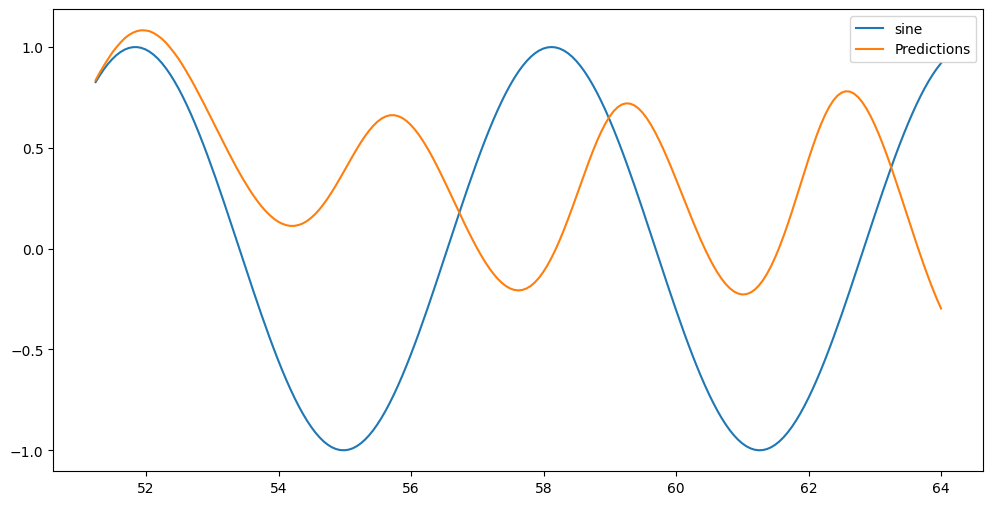

In [ ]:
##PVG98
#Visualizing the data of updated test data
#Comparing the predicted sine wave against the original sine wave
data_test.plot(figsize=(12,6))